#  IBM COMPANY ATTRITION 

# ABOUT PROJECT :
IBM COMPANY WANTS US TO STUDY EMPLOYEE ATTRITION ,BASED ON VARIOUS FACTORS .KNOWING WHICH DEPARTMENTS ARE HAVING
MOST PEOPLE LEAVING IS CRUCIAL IN MANAGEMENT AS IT IN A HUGE WAY INDICATES THE BEST AND WORST PERFOMING DEPARTMENTS .
ALSO KNOWING ABOUT ATTRITION IS ESSENTIAL IN DETERMINING NEW HIRES OR RECRUITMENTS.A MAJORITY OF THE ANALYSIS I HAVE DONE 
USING MICROSOFT BI ,IN THIS THERE ARE A FEW VISUALIZATION BUT MAJORLY THE PROJECT FOCUSES OF DEVELOPING  A MACHINE LEARNING
MODEL TO PREDICT COMPANY ATTRITION

In [ ]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv("C:\\Data Analysis Power BI\\IBM COMPANY PROJECT\\IBM.csv")

In [4]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [5]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [6]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [7]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [9]:
df.shape

(1470, 13)

In [12]:
# Checking for the most frequent items in columns 
for column in df.columns :
    print(f"The Most frequent appearing items in {column} column  are :\n")
    print(df[column].value_counts().head(5))

The Most frequent appearing items in Age column  are :

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64
The Most frequent appearing items in Attrition column  are :

No     1233
Yes     237
Name: Attrition, dtype: int64
The Most frequent appearing items in Department column  are :

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
The Most frequent appearing items in DistanceFromHome column  are :

2     211
1     208
10     86
9      85
3      84
Name: DistanceFromHome, dtype: int64
The Most frequent appearing items in Education column  are :

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
The Most frequent appearing items in EducationField column  are :

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: EducationField, dtype: int64
The Most frequent appearing items in EnvironmentSatisfaction

# FREQUENCY DISTRIBUTION VISUALIZATIONS
KNOWING THE MOST FREQUENT ITEMS IN EACH COLUMN CAN BE TURNED INTO AN EARLY INDICATOR FOR THE NECESSARY STRATEGUM BY THE MANAGEMENT

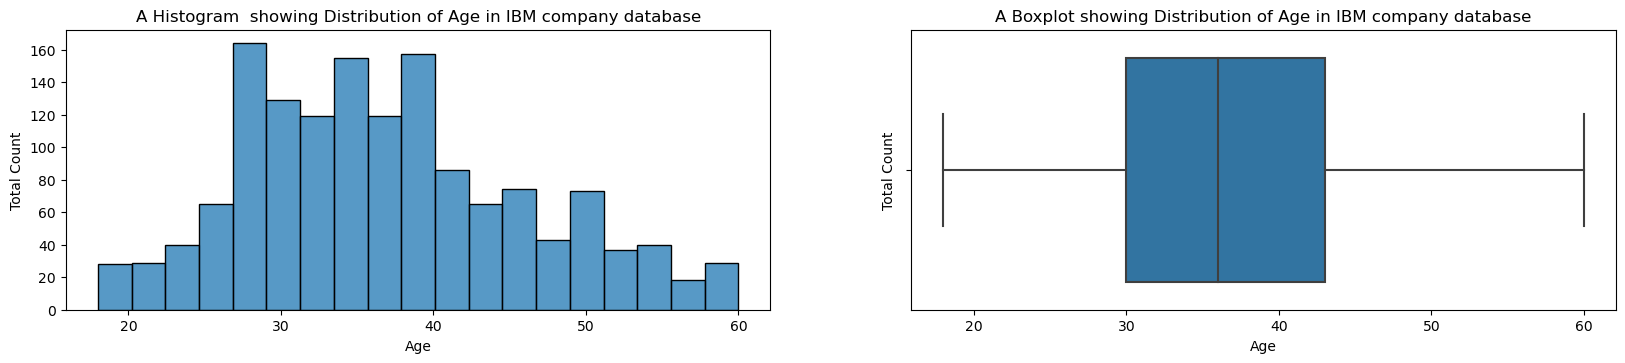

In [15]:
# Age 
fig=plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x='Age',data=df)
plt.ylabel("Total Count")
plt.title("A Histogram  showing Distribution of Age in IBM company database")
plt.subplot(2,2,2)
sns.boxplot(x='Age',data=df)
plt.ylabel("Total Count")
plt.title("A Boxplot showing Distribution of Age in IBM company database")
plt.show() # seems like 

In [17]:
# So For the Categorical columns we can create  a countplot is a sure way to visualize
# Lets create a function that does this
def draw_countplot(column,hue=None,data=df):
    """Args :
    column - The phenomenon we intend to study its distribution
    hue - the choice of hue we can use to filter or distribution
    data - The DataFrame under study 
    Its upto the user to decide on these factors :
    Returns:
    A well labelled Countplot 
    """
    fig = plt.figure(figsize=(20,8))
    sns.countplot(x=column,hue=hue,data=data)
    plt.ylabel('Total Count')
    plt.title(f"A countplot showing the distribution of {column}")
    plt.show()
              

In [22]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [23]:
categorical_columns = ['Attrition','Department','EducationField','MaritalStatus']

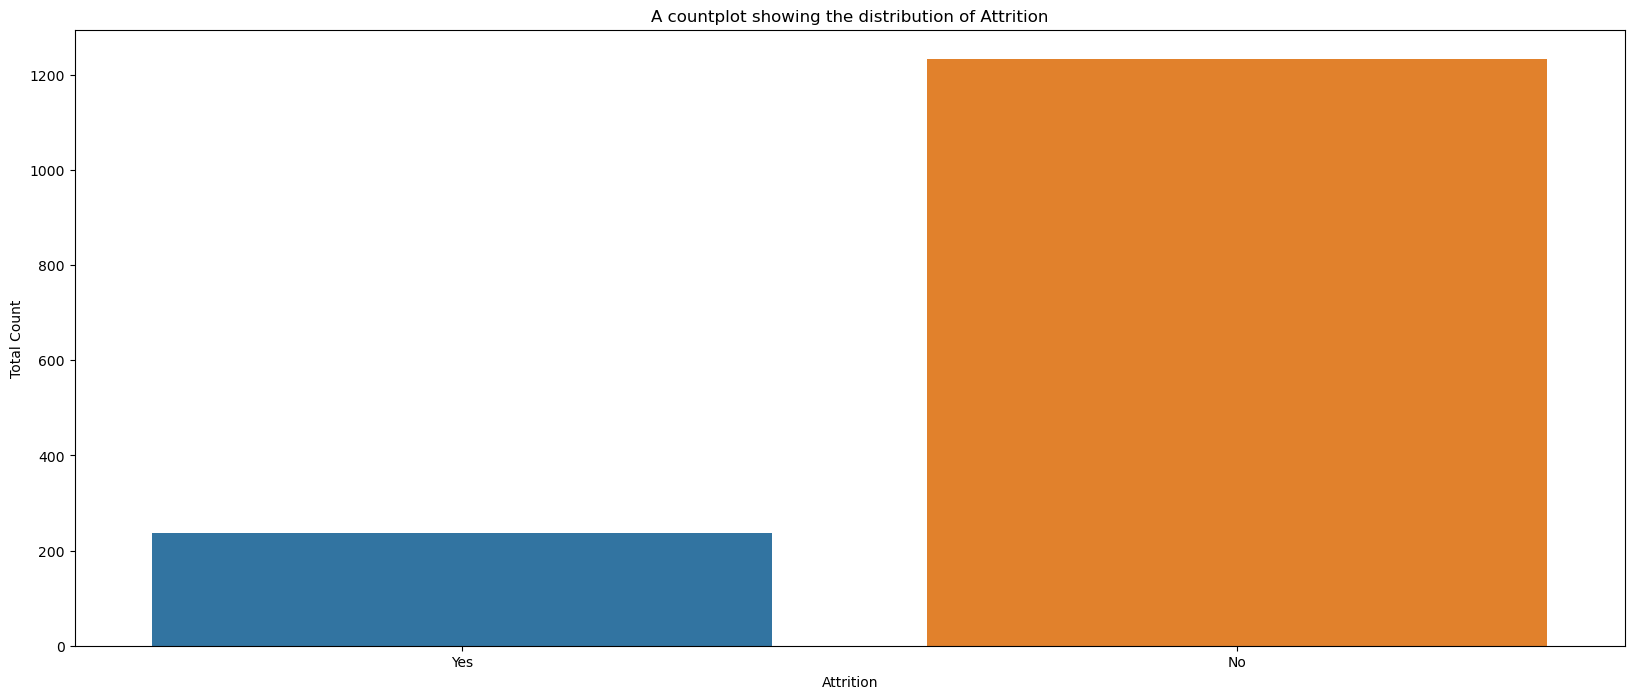

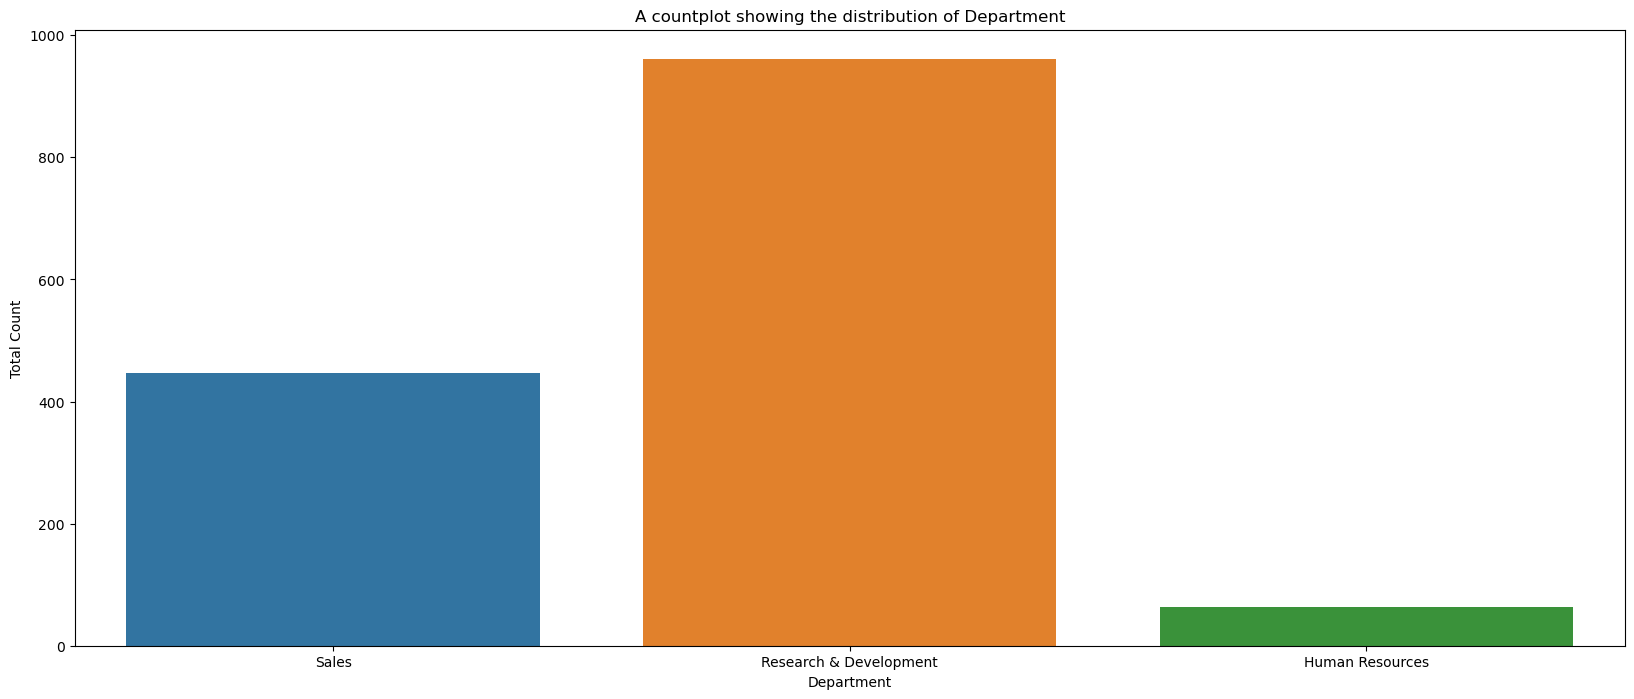

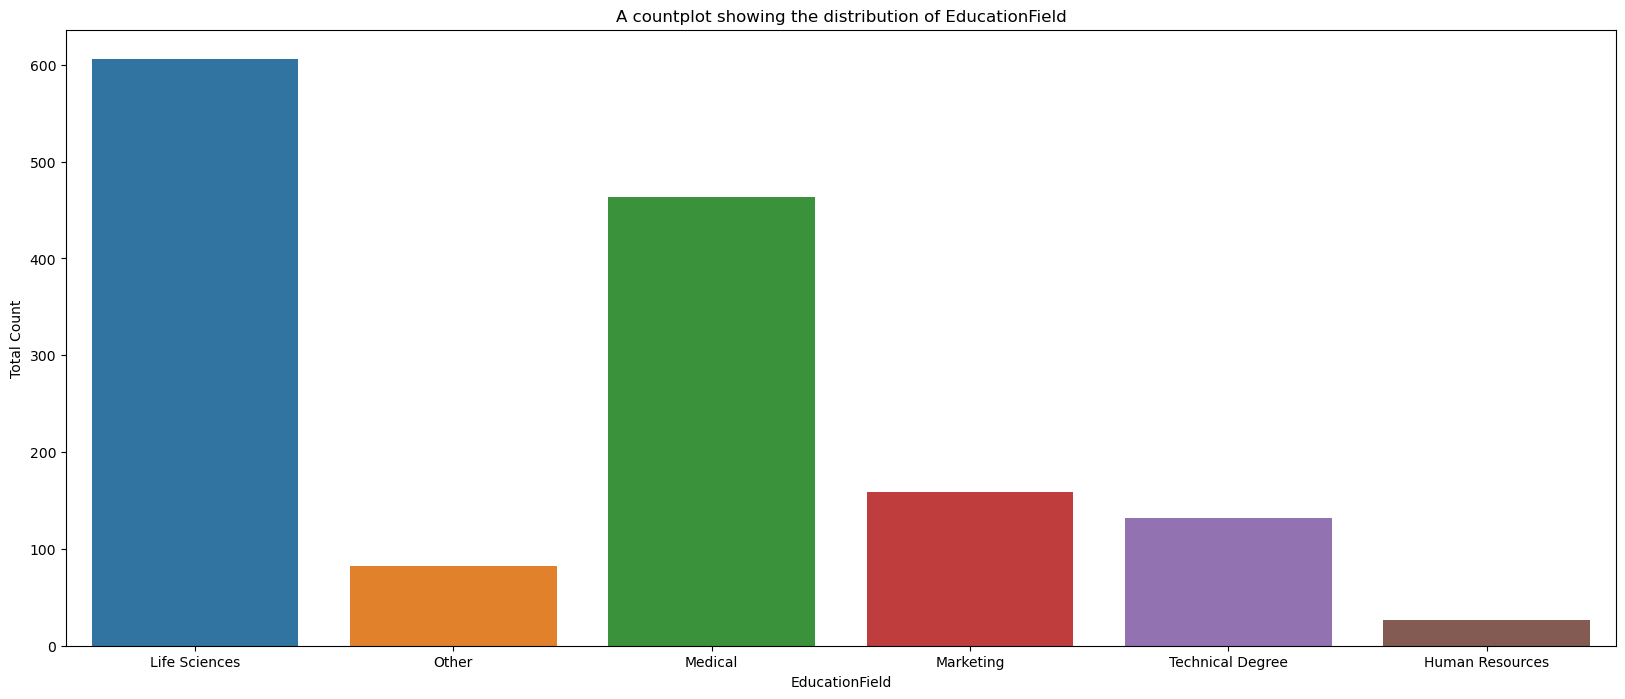

In [24]:
for column in categorical_columns :
    if column in 'MaritalStatus':
        pass
    else :
        draw_countplot(column)

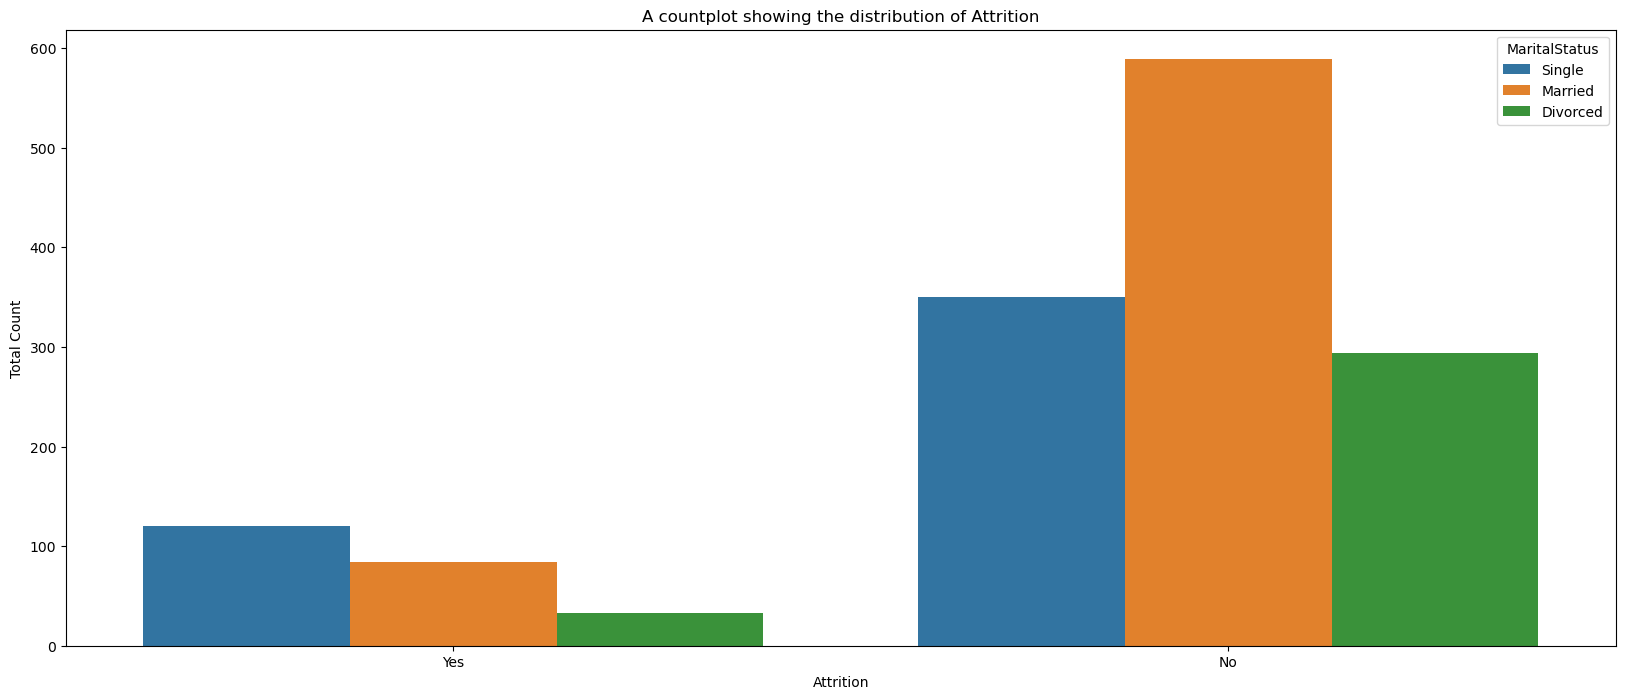

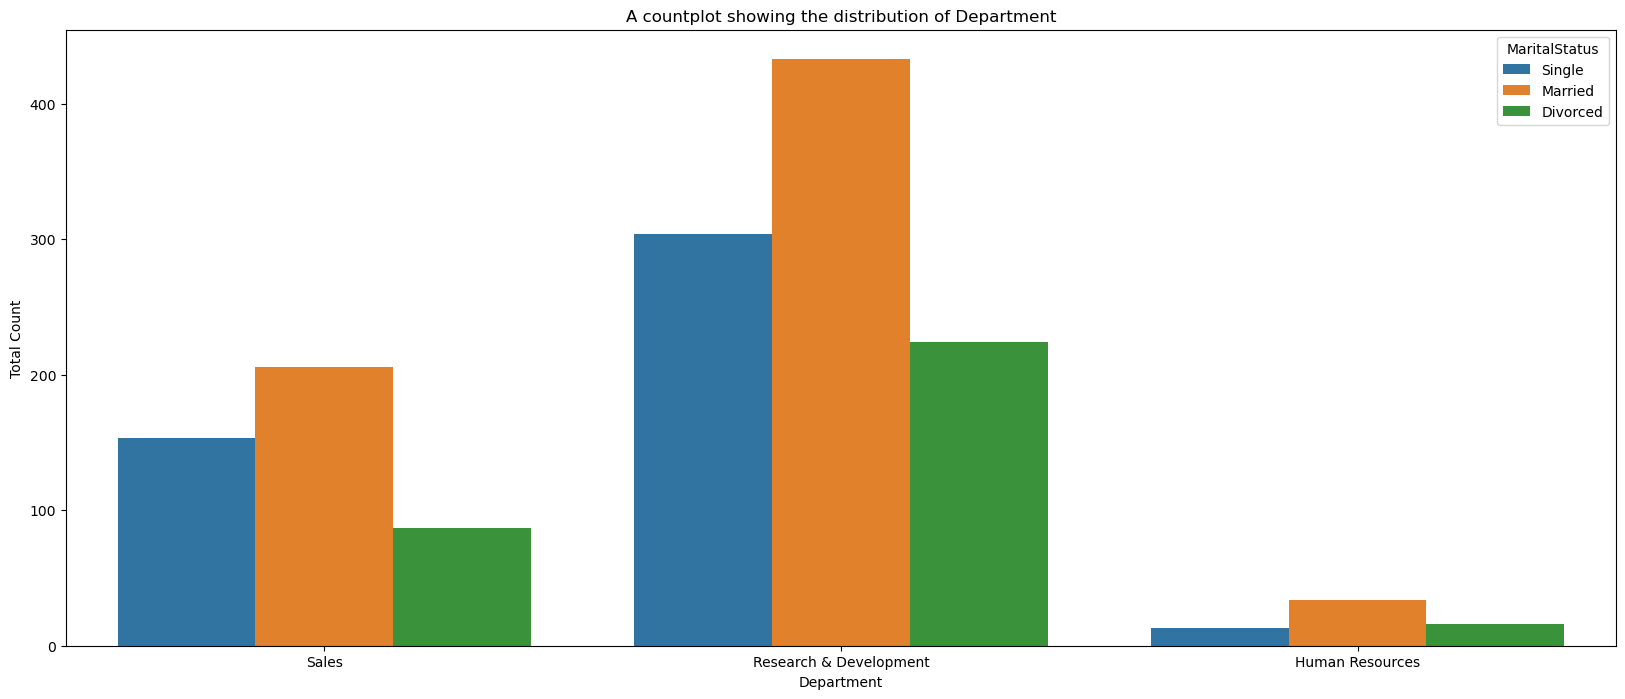

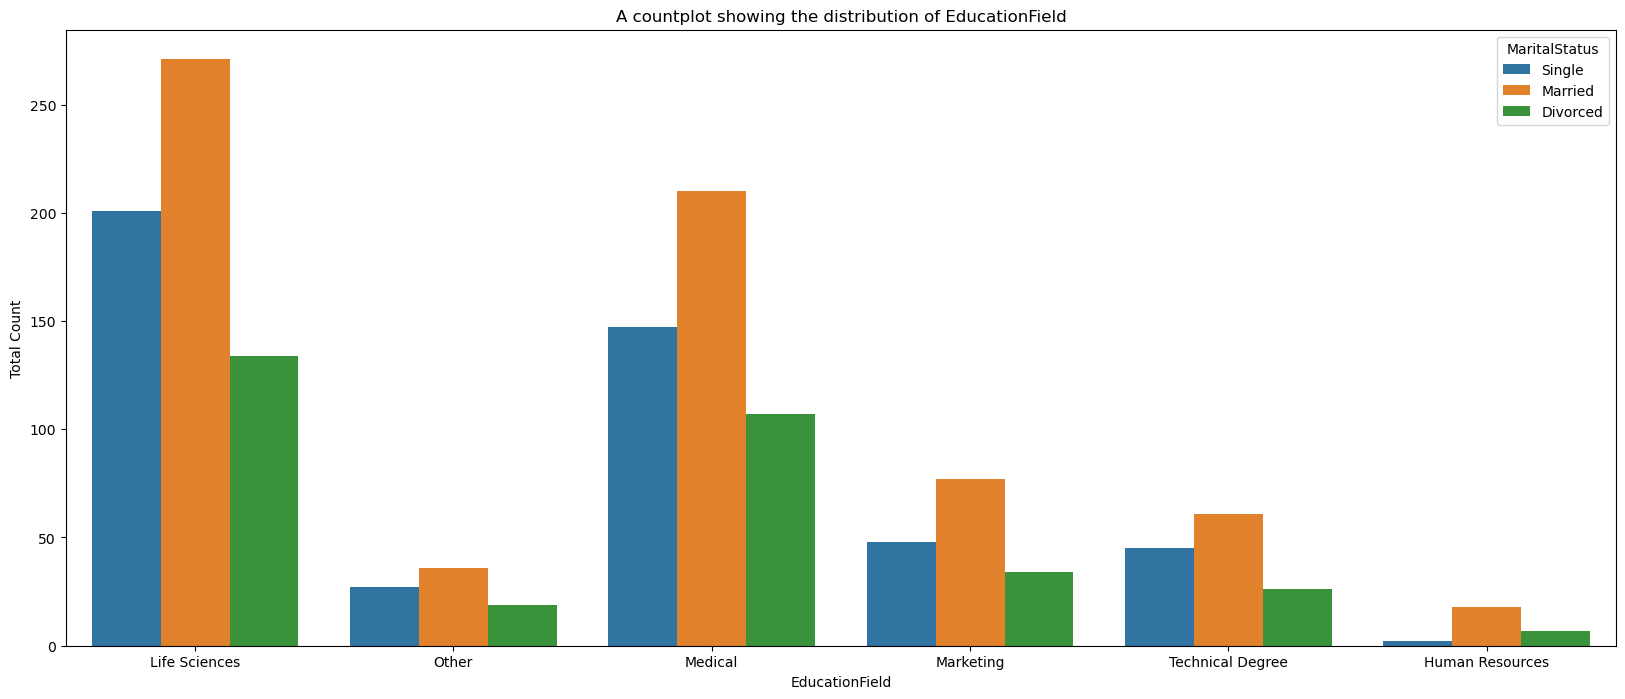

In [25]:
for column in categorical_columns :
    if column in 'MaritalStatus':
        pass
    else :
        draw_countplot(column,hue='MaritalStatus')

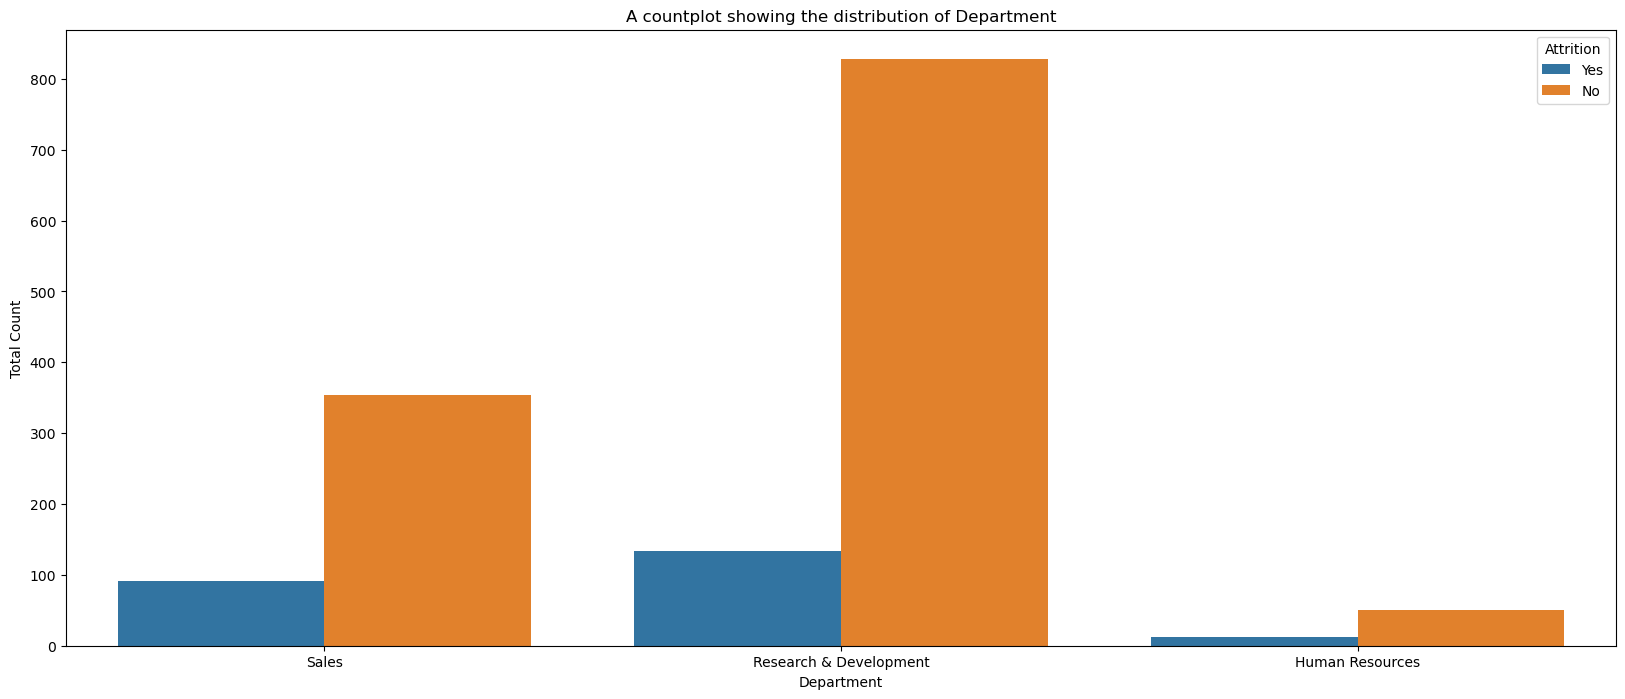

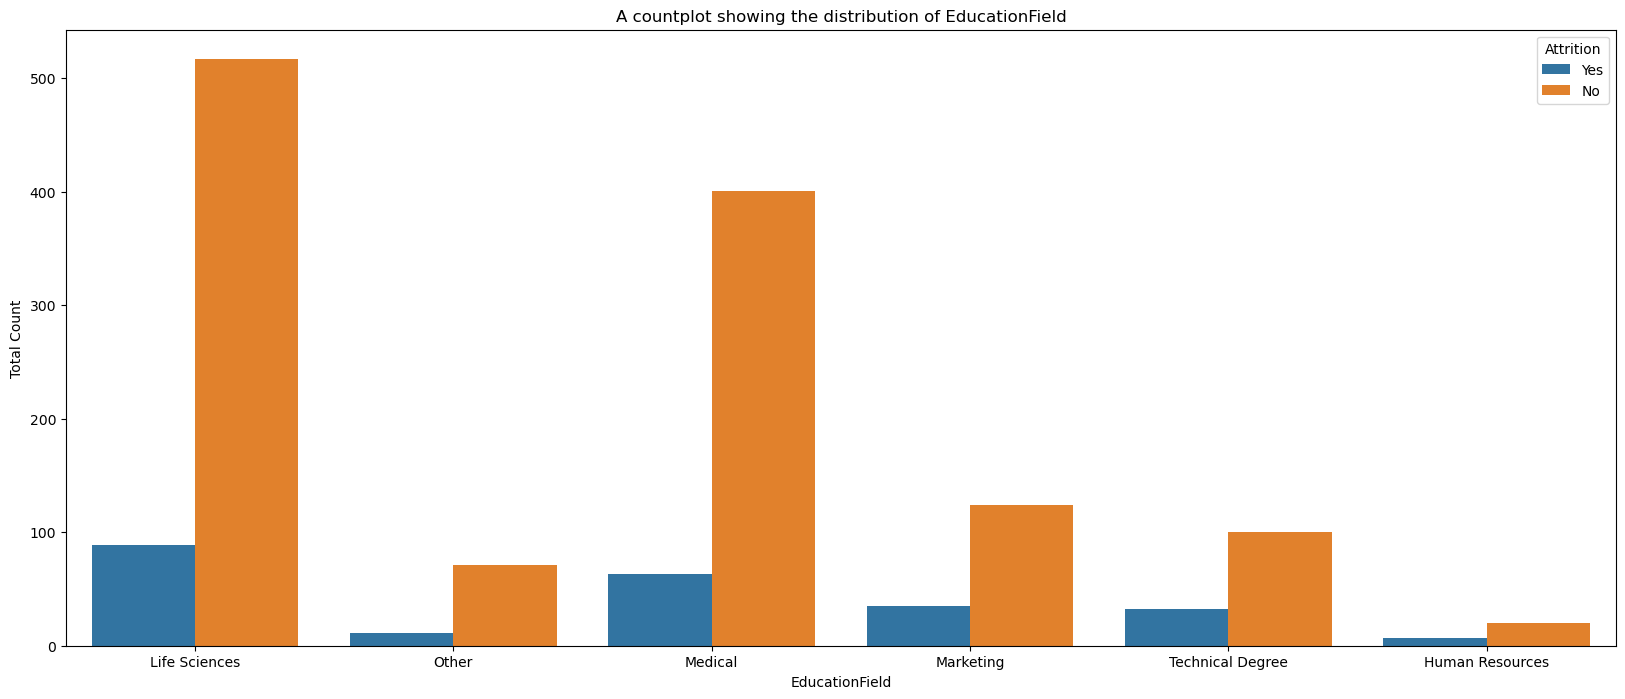

In [26]:
for column in categorical_columns :
    if column in ['MaritalStatus','Attrition']:
        pass
    else :
        draw_countplot(column,hue='Attrition') # Research and Development are leaving the company the most

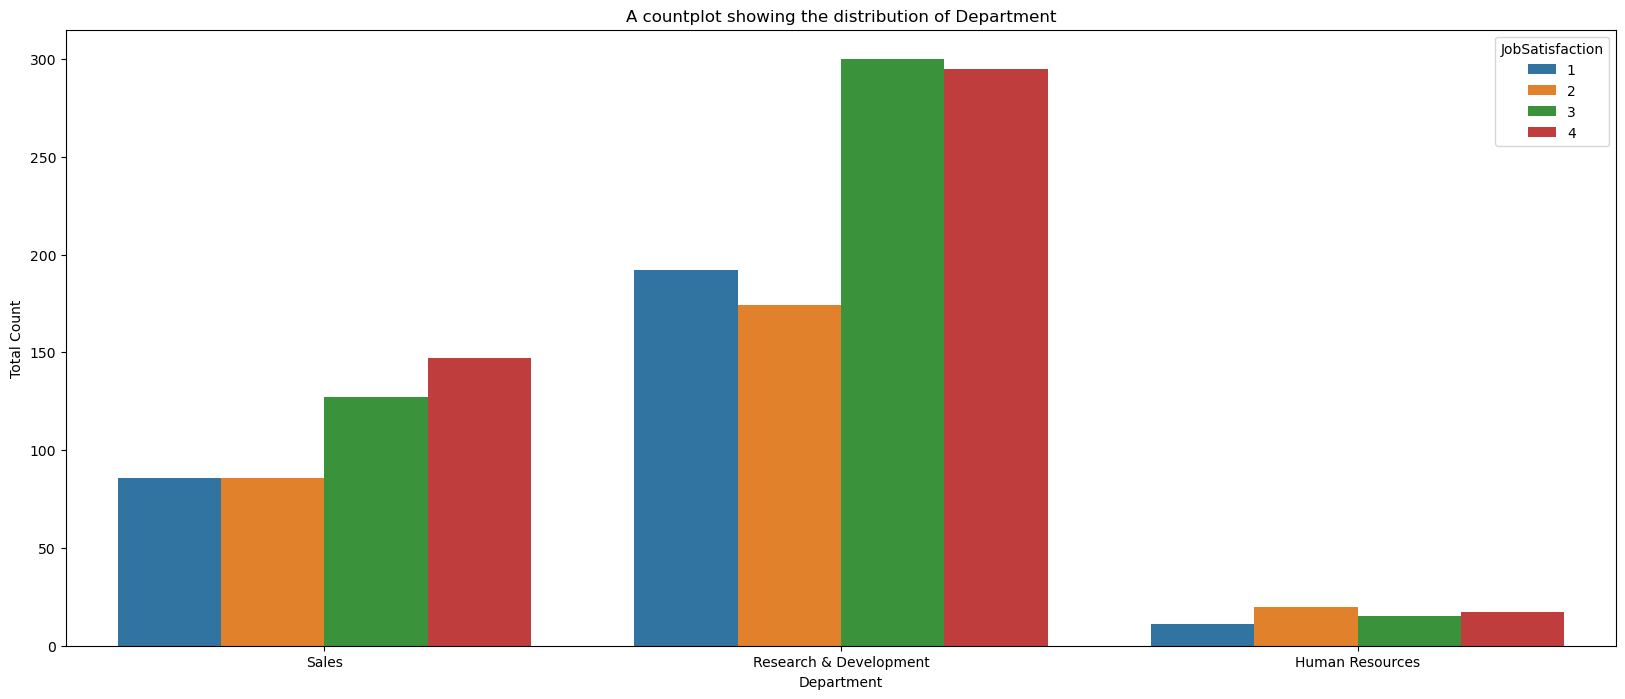

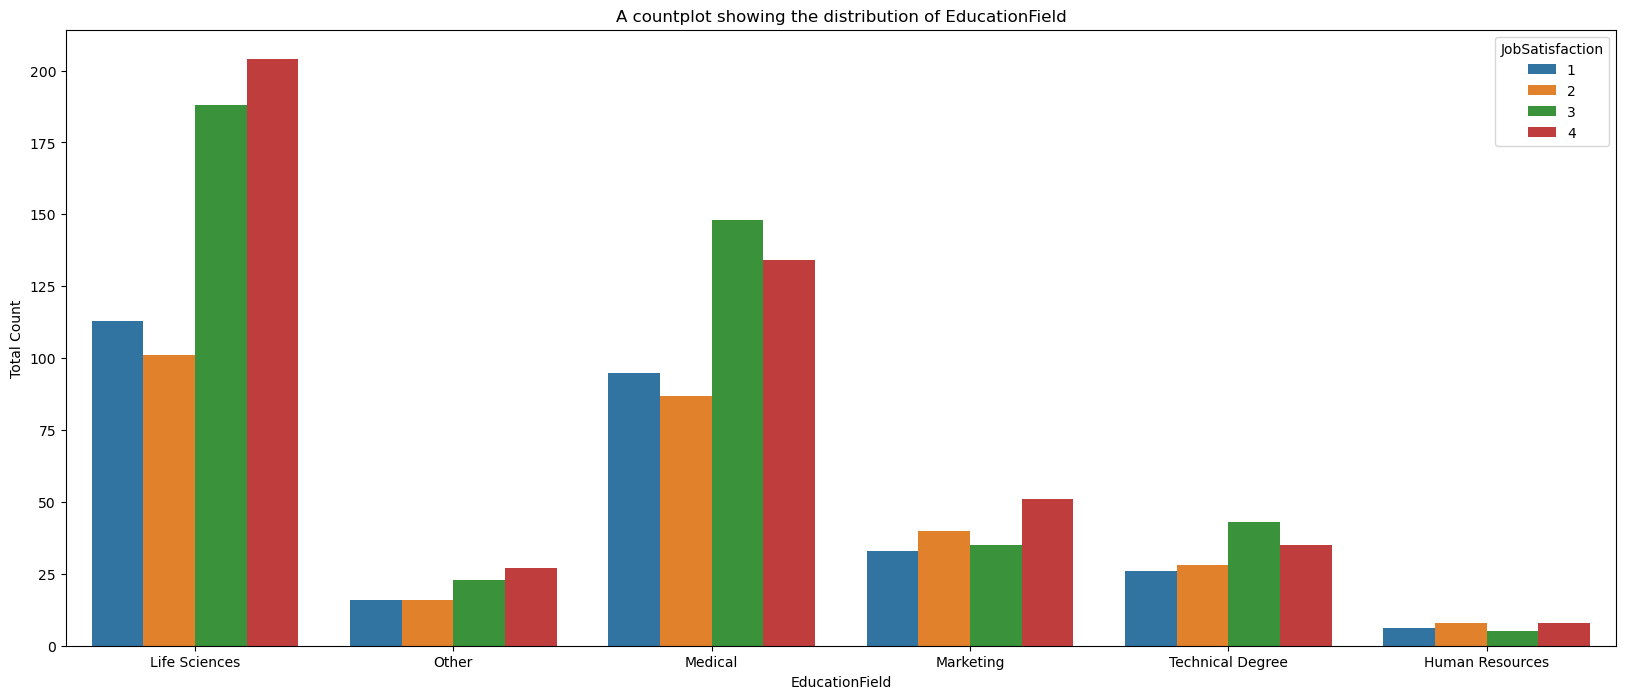

In [30]:
# OVERALL JOB SATISFACTION
for column in categorical_columns :
    if column in ['MaritalStatus','Attrition']:
        pass
    else :
        draw_countplot(column,hue='JobSatisfaction')

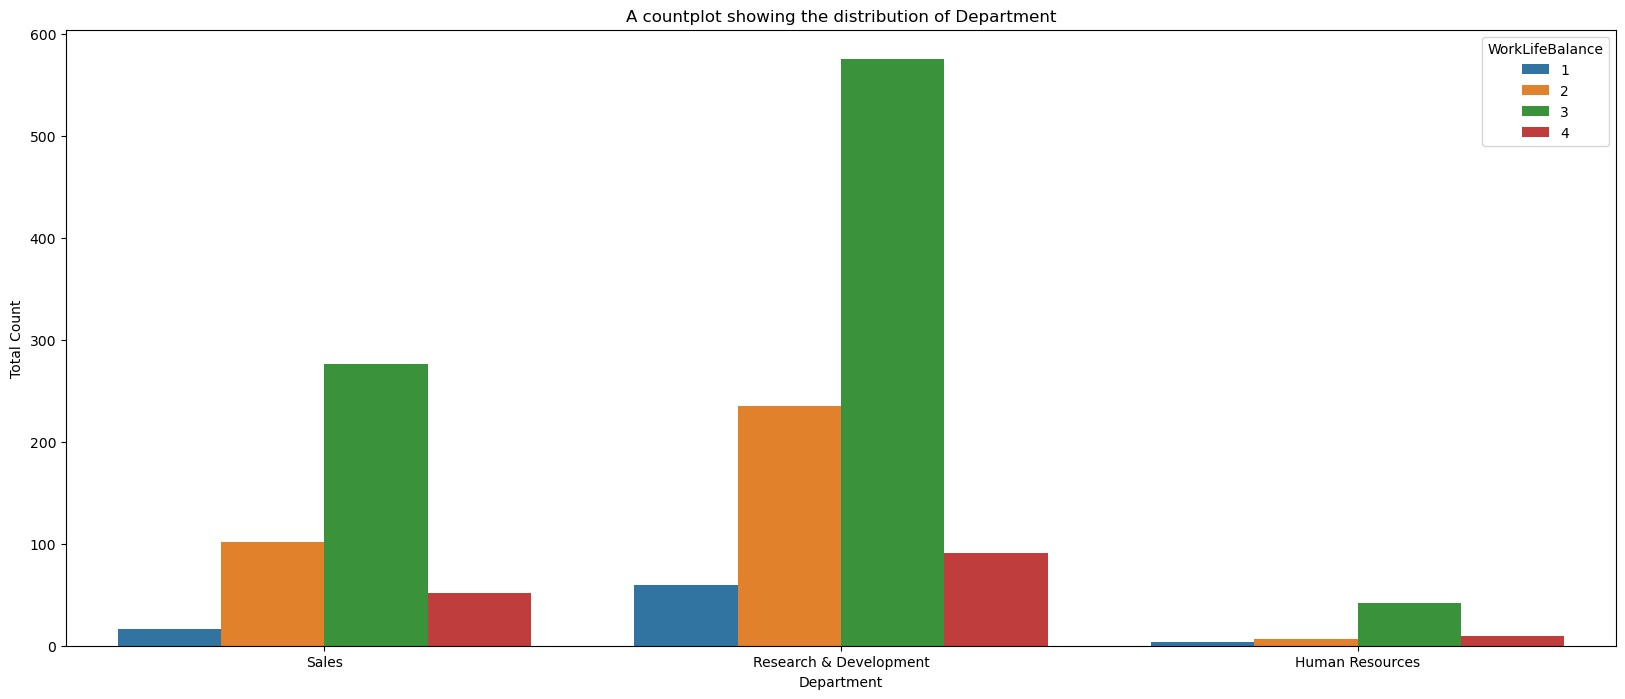

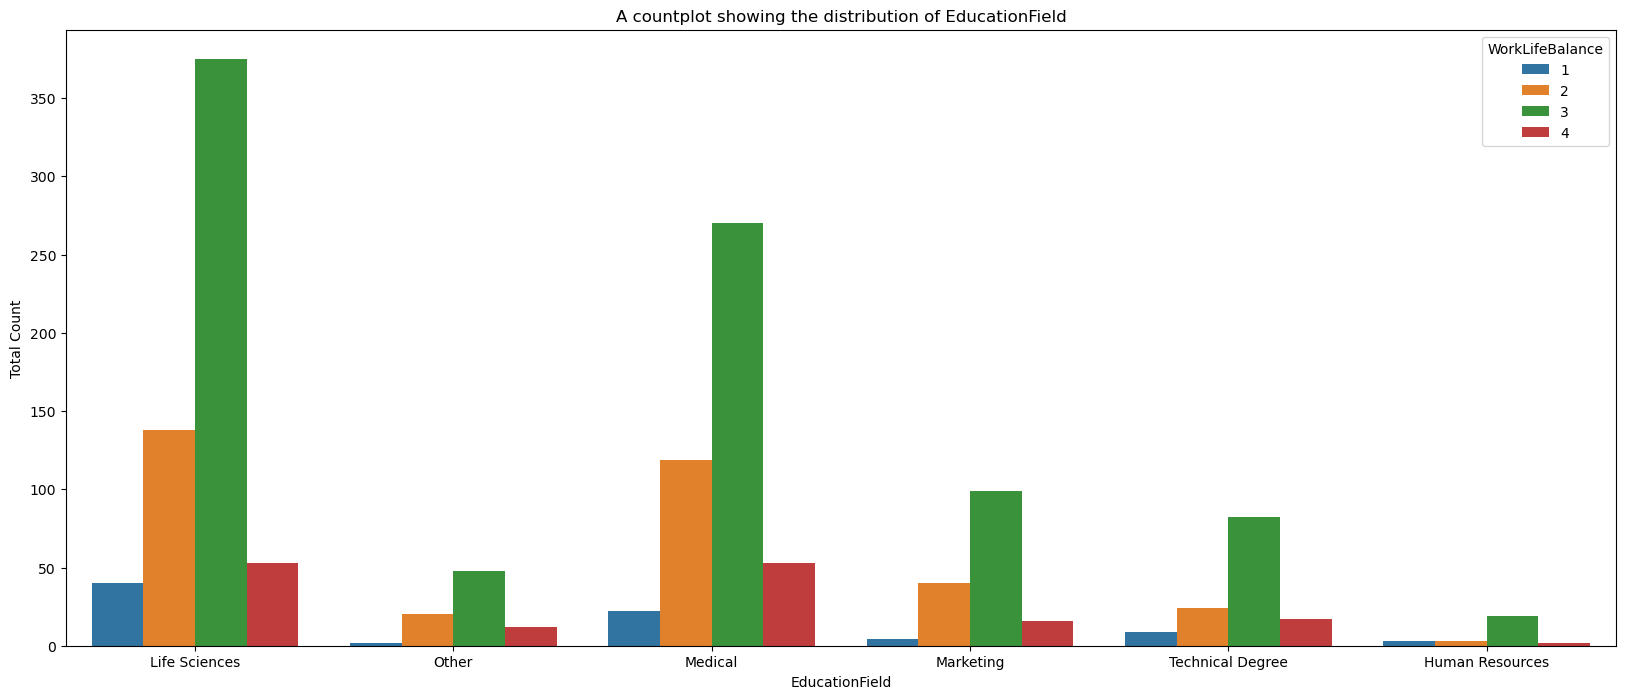

In [31]:
# WORKLIFE BALANCE
for column in categorical_columns :
    if column in ['MaritalStatus','Attrition']:
        pass
    else :
        draw_countplot(column,hue='WorkLifeBalance') # Work life balance scored the least in Research Department

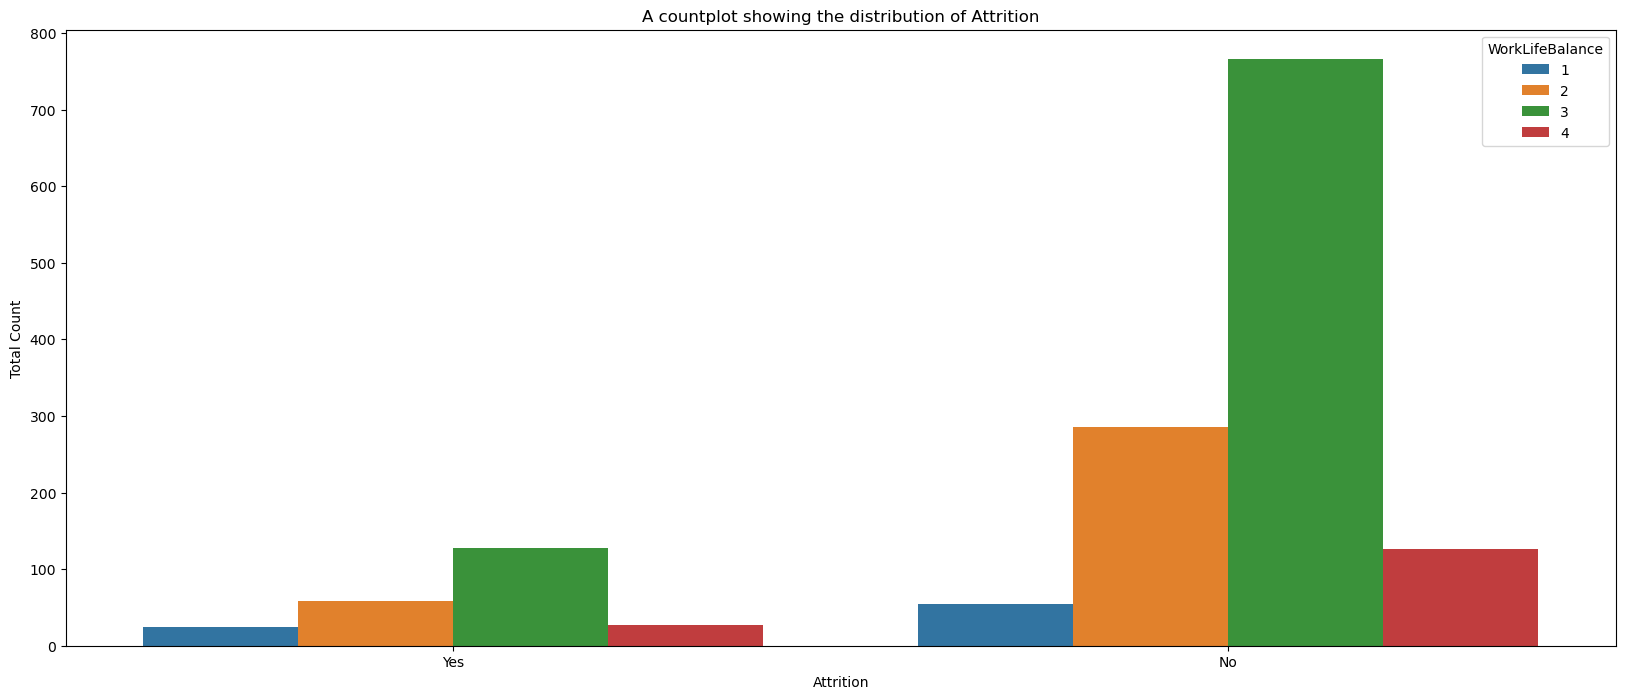

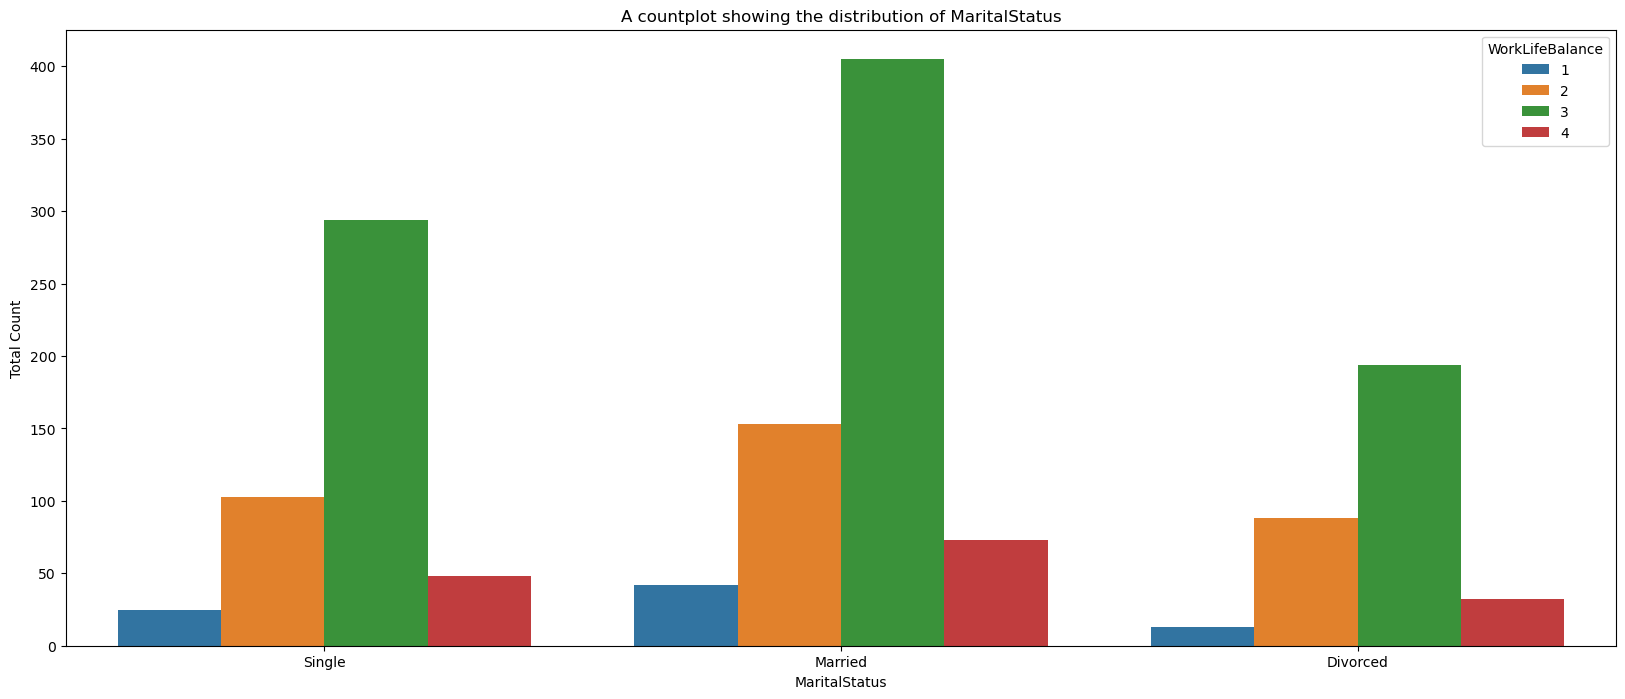

In [32]:
for column in categorical_columns :
    if column not in ['MaritalStatus','Attrition']:
        pass
    else :
        draw_countplot(column,hue='WorkLifeBalance') # A lot of married employees have a problem with the least work life balance

# DATA PREPROCESSING 

In [45]:
categorical_columns
lbl_encoder ={}
for column in categorical_columns :
    lbl_encoder[column] = LabelEncoder()
    df[column] = lbl_encoder[column].fit_transform(df[column])

In [46]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2


In [50]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']
X = StandardScaler().fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# MACHINE LEARNING 

In [52]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [55]:
dtc.fit(X_train,y_train)
dt_predictions = dtc.predict(X_test)
print("CLASSIFICATION REPORT :\n")
print(classification_report(y_test,dt_predictions))

CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       255
           1       0.20      0.28      0.24        39

    accuracy                           0.76       294
   macro avg       0.54      0.56      0.55       294
weighted avg       0.79      0.76      0.77       294



In [56]:
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_test)
print("CLASSIFICATION REPORT :\n")
print(classification_report(y_test,rfc_predictions))

CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [ ]:
# RANDOM FOREST MODELS PERFOMED BETTER WITH A HIGHER ACCURACY ,DECISION TREE MODEL PREDICTS MORE EMPLOYEES WILL LEAVE THE COMPANY

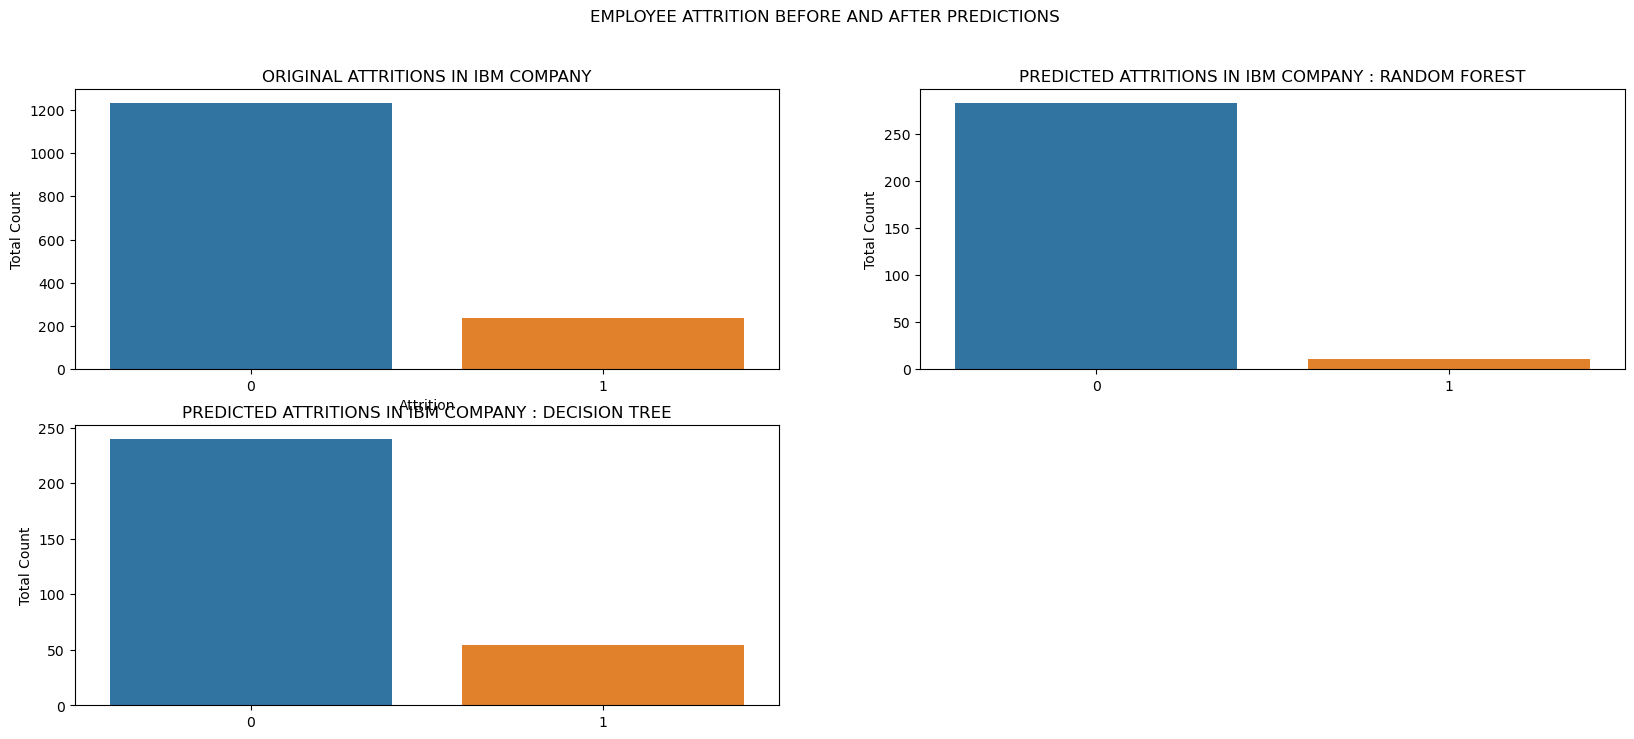

In [64]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
fig.suptitle('EMPLOYEE ATTRITION BEFORE AND AFTER PREDICTIONS')
sns.countplot(x='Attrition',data=df)
plt.ylabel("Total Count")
plt.title("ORIGINAL ATTRITIONS IN IBM COMPANY")
plt.subplot(2,2,2)
sns.countplot(x=rfc_predictions)
plt.ylabel('Total Count')
plt.title("PREDICTED ATTRITIONS IN IBM COMPANY : RANDOM FOREST")
plt.subplot(2,2,3)
sns.countplot(x=dt_predictions)
plt.ylabel("Total Count")
plt.title("PREDICTED ATTRITIONS IN IBM COMPANY : DECISION TREE")
plt.show()